In [175]:
import pandas as pd

# Load the Parquet file
df = pd.read_parquet("vars_compromisos_1.parquet")

# Display the first few rows
df.head()


,CONTACTO_ID_COMPLETO,TOTAL_DONADO,CANTIDAD_CUOTAS_PAGADAS_GLOBAL,DONANTE_ACTIVO,COMPROMISO_ACTIVO,IMPORTE_DONACION_PROM_6M,IMPORTE_DONACION_PROM_9M,IMPORTE_DONACION_PROM_12M,IMPORTE_DONACION_PROM_24M,CANTIDAD_DONACIONES_PLANIFICADAS_PROM_6M,...,TIPO_TARJETA,BANCO_EMISOR,CANAL_CAMPANA,CODIGO_AUDITORIA,CAMPANA_ACTIVIDAD,CAMPANA_FIDELIZACION,CODIGO_UBICACION,PUNTO_CAPTACION,TIPO_BAJA,MOTIVO_BAJA
0,003UX00000I33INYAZ,0.0,0,0,0,10.0,10.0,10.0,10.0,6.0,...,Otros,NaN,F2F,RF-F2F02,F2F CHICLAYO IF4C 2025,NaN,NaN,RIPLEY PIURA,NaN,NaN
1,003UX00000I33AHYAZ,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,F2F,RF-F2F01,F2F CLASICO LIMA 2025,NaN,NaN,PLAZA VEA LA BOLICHERA,NaN,NaN
2,003UX00000I2y49YAB,0.0,0,0,0,10.0,10.0,10.0,10.0,6.0,...,NaN,NaN,F2F,RF-F2F02,F2F CHICLAYO IF4C 2025,NaN,NaN,RIPLEY PIURA,NaN,NaN
3,003UX00000I2xssYAB,0.0,0,0,0,30.0,30.0,30.0,30.0,5.0,...,Visa Débito,INTERBANK,Telemarketing,AF7.1RETMK,TELEMARKETING 2025,NaN,Lima,BASE - 102,NaN,NaN
4,003UX00000I2tECYAZ,0.0,0,0,0,100.0,100.0,100.0,100.0,6.0,...,NaN,NaN,Telemarketing,AF7.1RETMK,TELEMARKETING 2025,NaN,Lima,BASE - 104,NaN,NaN


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37577 entries, 0 to 37576
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   CONTACTO_ID_COMPLETO                       37577 non-null  object  
 1   TOTAL_DONADO                               37577 non-null  float64 
 2   CANTIDAD_CUOTAS_PAGADAS_GLOBAL             37577 non-null  int64   
 3   DONANTE_ACTIVO                             37577 non-null  int64   
 4   COMPROMISO_ACTIVO                          37577 non-null  int64   
 5   IMPORTE_DONACION_PROM_6M                   21084 non-null  float64 
 6   IMPORTE_DONACION_PROM_9M                   21084 non-null  float64 
 7   IMPORTE_DONACION_PROM_12M                  21084 non-null  float64 
 8   IMPORTE_DONACION_PROM_24M                  21084 non-null  float64 
 9   CANTIDAD_DONACIONES_PLANIFICADAS_PROM_6M   21084 non-null  float64 
 10  CANTIDAD_D

In [177]:
!pip install lightgbm


In [178]:
df.drop(columns=["FECHA_ESTABLECIDA"], inplace=True)
df.drop(columns=["CONTACTO_ID_COMPLETO"], inplace=True)
df.drop(columns=["RECENCIA_DONACION"], inplace=True)
df.drop(columns=["DONANTE_ACTIVO_right"], inplace=True)
df.drop(columns=["ANTIGUEDAD_PRIMER_PAGO"], inplace=True)
df.drop(columns=["COMPROMISO_ACTIVO"], inplace=True)

In [179]:
from sklearn.model_selection import train_test_split

# Define target and features
target = "DONANTE_ACTIVO"
X = df.drop(columns=[target])
y = df[target]

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [180]:
cat_cols = [
    "TIPO_COMPROMISO",
    "TIPO_REGISTRO",
    "FRECUENCIA",
    "MEDIO_PAGO",
    "ENTIDAD_COBRADORA",
    "TIPO_CUENTA",
    "TIPO_TARJETA",
    "BANCO_EMISOR",
    "CANAL_CAMPANA",
    "CODIGO_AUDITORIA",
    "CAMPANA_ACTIVIDAD",
    "CAMPANA_FIDELIZACION",
    "CODIGO_UBICACION",
    "PUNTO_CAPTACION",
    "TIPO_BAJA",
    "MOTIVO_BAJA"
]

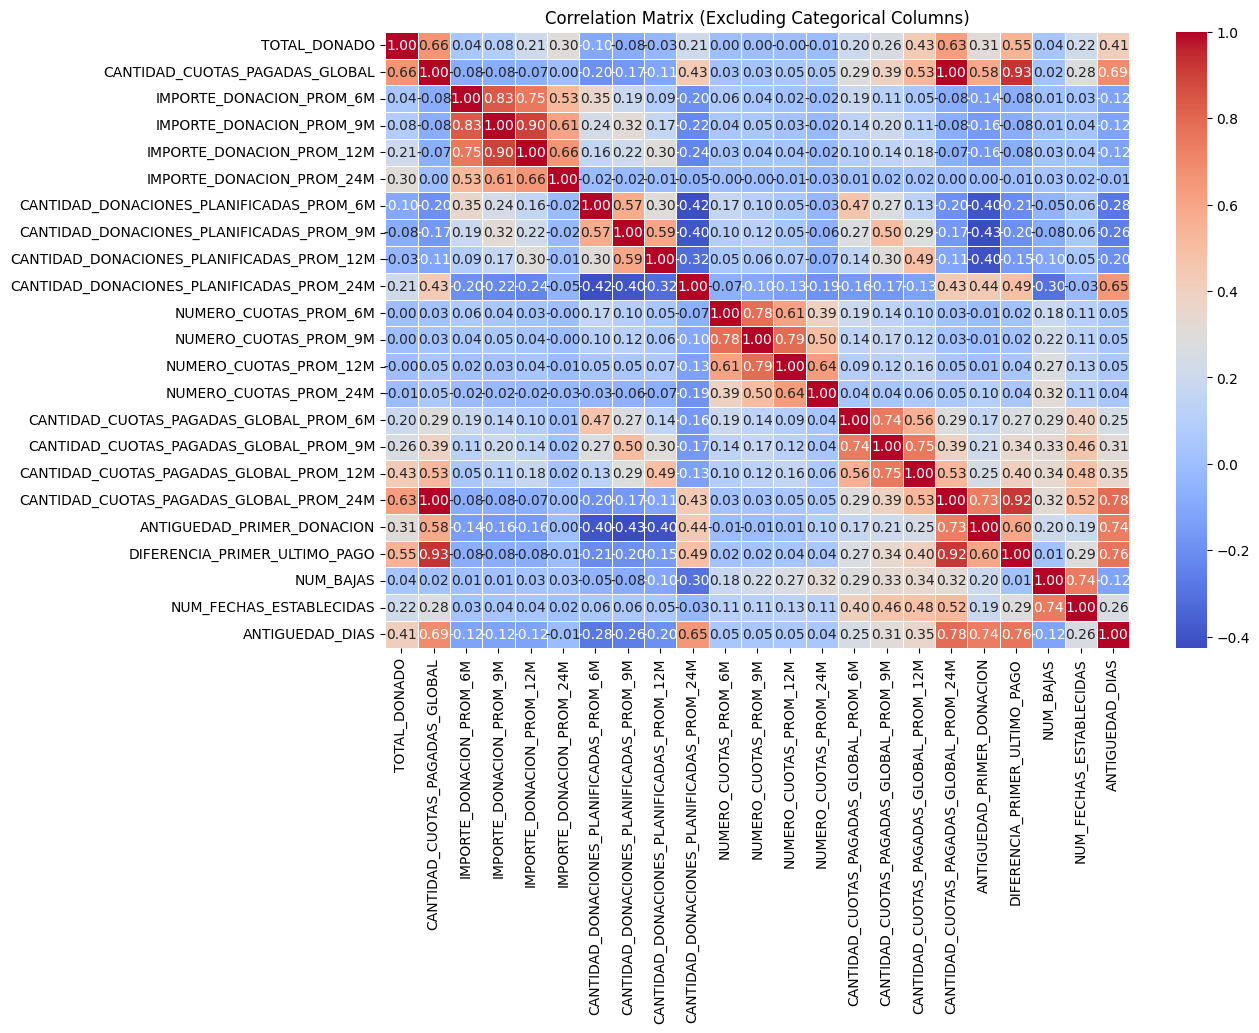

In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns to exclude
cat_cols = [
    "TIPO_COMPROMISO", "TIPO_REGISTRO", "FRECUENCIA", "MEDIO_PAGO",
    "ENTIDAD_COBRADORA", "TIPO_CUENTA", "TIPO_TARJETA", "BANCO_EMISOR",
    "CANAL_CAMPANA", "CODIGO_AUDITORIA", "CAMPANA_ACTIVIDAD",
    "CAMPANA_FIDELIZACION", "CODIGO_UBICACION", "PUNTO_CAPTACION",
    "TIPO_BAJA", "MOTIVO_BAJA"
]

# Exclude categorical columns
numerical_features = X_train.drop(columns=cat_cols, errors="ignore")

# Compute correlation matrix
correlation_matrix = numerical_features.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix (Excluding Categorical Columns)")
plt.show()


In [182]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Use in LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_cols)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=cat_cols, reference=train_data)

# Set model parameters
params = {
    "objective": "binary",  # Binary classification
    "metric": "binary_error",  # Evaluation metric
    "boosting_type": "gbdt",  # Gradient Boosting Decision Tree
    "learning_rate": 0.01,  # Reduced learning rate for better generalization
    "num_leaves": 15,  # Reduced number of leaves to limit model complexity
    "max_depth": 5,  # Limited max depth to prevent overfitting
    "feature_fraction": 0.8,  # Randomly select 80% of features for each tree
    "bagging_fraction": 0.8,  # Randomly select 80% of data for each tree
    "bagging_freq": 5,  # Perform bagging every 5 iterations
    "lambda_l1": 0.1,  # L1 regularization to reduce overfitting
    "lambda_l2": 0.1,  # L2 regularization to reduce overfitting
    "verbosity": -1  # Suppress LightGBM logs
}

# Train the model with more boosting rounds
model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=500)

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9840


In [183]:
# Make predictions
y_pred_prob = model.predict(X_test)  # Get probability scores
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print statistics
print("Model Performance Statistics:")
print(f"Accuracy: {accuracy:.4f}")




Model Performance Statistics:
Accuracy: 0.9840



Top 10 Most Important Features:
ANTIGUEDAD_PRIMER_DONACION: 1748
DIFERENCIA_PRIMER_ULTIMO_PAGO: 1715
NUM_BAJAS: 428
CANTIDAD_DONACIONES_PLANIFICADAS_PROM_24M: 329
CANTIDAD_CUOTAS_PAGADAS_GLOBAL: 326
TIPO_BAJA: 286
ANTIGUEDAD_DIAS: 284
NUMERO_CUOTAS_PROM_24M: 244
CANTIDAD_DONACIONES_PLANIFICADAS_PROM_12M: 205
CANTIDAD_CUOTAS_PAGADAS_GLOBAL_PROM_24M: 200


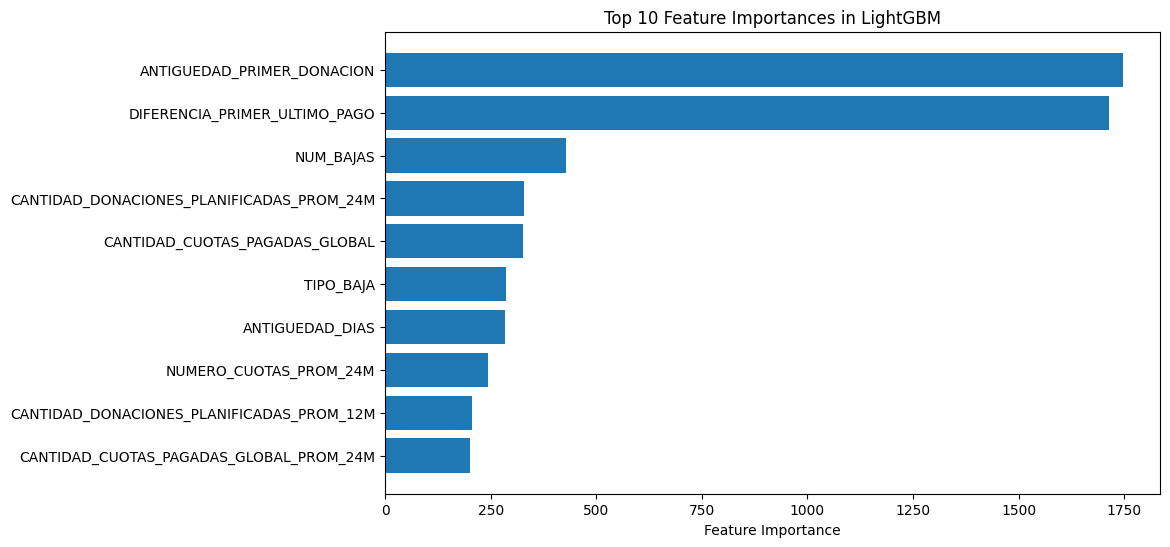

In [184]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importance = model.feature_importance()
feature_names = X_train.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Print top important features
print("\nTop 10 Most Important Features:")
for i in range(10):
    print(f"{feature_names[sorted_idx[i]]}: {feature_importance[sorted_idx[i]]}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(10), feature_importance[sorted_idx[:10]], align="center")
plt.yticks(range(10), [feature_names[i] for i in sorted_idx[:10]])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances in LightGBM")
plt.show()


In [185]:
import pandas as pd

# Calculate total importance sum
total_importance = feature_importance.sum()

# Calculate relative importance as a percentage of total importance
relative_importance = (feature_importance[sorted_idx] / total_importance) * 100

# Create DataFrame
importance_df = pd.DataFrame({
    "Variable Name": feature_names[sorted_idx],
    "Importance Value": feature_importance[sorted_idx],
    "Relative Importance (%)": relative_importance
})

# Display the top 10 features
importance_df.head(40)


,Variable Name,Importance Value,Relative Importance (%)
0,ANTIGUEDAD_PRIMER_DONACION,1748,25.021472
1,DIFERENCIA_PRIMER_ULTIMO_PAGO,1715,24.549098
2,NUM_BAJAS,428,6.126539
3,CANTIDAD_DONACIONES_PLANIFICADAS_PROM_24M,329,4.709419
4,CANTIDAD_CUOTAS_PAGADAS_GLOBAL,326,4.666476
5,TIPO_BAJA,286,4.093902
6,ANTIGUEDAD_DIAS,284,4.065273
7,NUMERO_CUOTAS_PROM_24M,244,3.492700
8,CANTIDAD_DONACIONES_PLANIFICADAS_PROM_12M,205,2.934440
9,CANTIDAD_CUOTAS_PAGADAS_GLOBAL_PROM_24M,200,2.862869


The following variables have no importance to the model:

* CANAL_CAMPANA
* IMPORTE_DONACION_PROM_9M
* IMPORTE_DONACION_PROM_12M
* IMPORTE_DONACION_PROM_24M
* TIPO_CUENTA
* NUMERO_CUOTAS_PROM_6M
* NUMERO_CUOTAS_PROM_9M
* MOTIVO_BAJA
* TIPO_REGISTRO
* CODIGO_AUDITORIA
* CAMPANA_ACTIVIDAD
* CAMPANA_FIDELIZACION
* CODIGO_UBICACION
* BANCO_EMISOR
* TIPO_TARJETA
* ENTIDAD_COBRADORA
* MEDIO_PAGO.

In [186]:
# List of columns to drop
columns_to_drop = [
    "CANAL_CAMPANA", "IMPORTE_DONACION_PROM_9M", "IMPORTE_DONACION_PROM_12M", "IMPORTE_DONACION_PROM_24M",
    "TIPO_CUENTA", "NUMERO_CUOTAS_PROM_6M", "NUMERO_CUOTAS_PROM_9M", "MOTIVO_BAJA", "TIPO_REGISTRO",
    "CODIGO_AUDITORIA", "CAMPANA_ACTIVIDAD", "CAMPANA_FIDELIZACION", "CODIGO_UBICACION", "BANCO_EMISOR",
    "TIPO_TARJETA", "ENTIDAD_COBRADORA", "MEDIO_PAGO"
]

# Drop the columns
df = df.drop(columns=columns_to_drop, errors="ignore")

# Display the updated DataFrame
df.head()


,TOTAL_DONADO,CANTIDAD_CUOTAS_PAGADAS_GLOBAL,DONANTE_ACTIVO,IMPORTE_DONACION_PROM_6M,CANTIDAD_DONACIONES_PLANIFICADAS_PROM_6M,CANTIDAD_DONACIONES_PLANIFICADAS_PROM_9M,CANTIDAD_DONACIONES_PLANIFICADAS_PROM_12M,CANTIDAD_DONACIONES_PLANIFICADAS_PROM_24M,NUMERO_CUOTAS_PROM_12M,NUMERO_CUOTAS_PROM_24M,...,CANTIDAD_CUOTAS_PAGADAS_GLOBAL_PROM_24M,ANTIGUEDAD_PRIMER_DONACION,DIFERENCIA_PRIMER_ULTIMO_PAGO,NUM_BAJAS,NUM_FECHAS_ESTABLECIDAS,ANTIGUEDAD_DIAS,TIPO_COMPROMISO,FRECUENCIA,PUNTO_CAPTACION,TIPO_BAJA
0,0.0,0,0,10.0,6.0,6.0,6.0,6.0,0.0,0.0,...,0.0,NaN,NaN,0,1,25,Primer Compromiso,Mensual,RIPLEY PIURA,NaN
1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,1,25,Primer Compromiso,Mensual,PLAZA VEA LA BOLICHERA,NaN
2,0.0,0,0,10.0,6.0,6.0,6.0,6.0,0.0,0.0,...,0.0,NaN,NaN,0,1,25,Primer Compromiso,Mensual,RIPLEY PIURA,NaN
3,0.0,0,0,30.0,5.0,5.0,5.0,5.0,0.0,0.0,...,0.0,NaN,NaN,0,1,25,Primer Compromiso,Mensual,BASE - 102,NaN
4,0.0,0,0,100.0,6.0,6.0,6.0,6.0,0.0,0.0,...,0.0,NaN,NaN,0,1,25,Primer Compromiso,Mensual,BASE - 104,NaN


In [187]:

# Define target variable
target = "DONANTE_ACTIVO"

# Split into features and target
X = df.drop(columns=[target])
y = df[target]

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define categorical features (if any)
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

# Convert categorical variables to categorical type for LightGBM
for col in cat_cols:
    X_train[col] = X_train[col].astype("category")
    X_test[col] = X_test[col].astype("category")

# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_cols)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=cat_cols, reference=train_data)

# Set model parameters
params = {
    "objective": "binary",
    "metric": "binary_error",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "max_depth": -5,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbosity": -1
}

# Train the model
model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100)

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9900


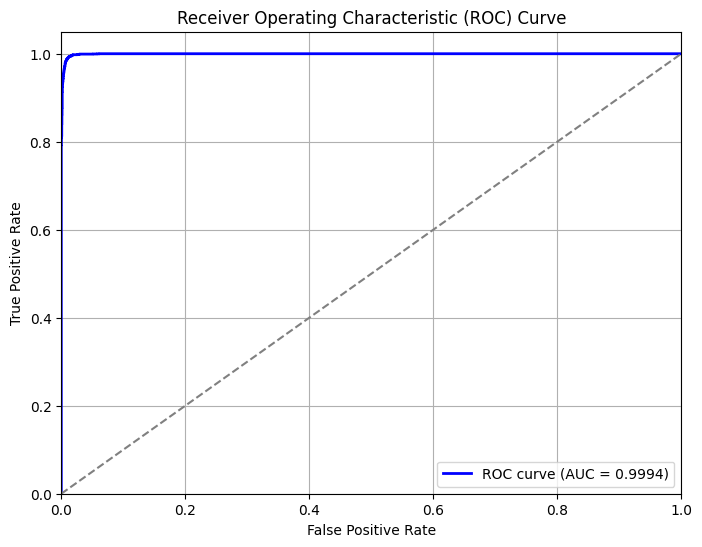

Model Accuracy: 0.9900
ROC AUC Score: 0.9994


In [188]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split

# Define target variable
target = "DONANTE_ACTIVO"

# Split into features and target
X = df.drop(columns=[target])
y = df[target]

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define categorical features (if any)
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

# Convert categorical variables to categorical type for LightGBM
for col in cat_cols:
    X_train[col] = X_train[col].astype("category")
    X_test[col] = X_test[col].astype("category")

# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_cols)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=cat_cols, reference=train_data)

# Set model parameters
params = {
    "objective": "binary",
    "metric": "binary_error",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "max_depth": -5,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbosity": -1
}

# Train the model
model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100)

# Make predictions
y_pred = model.predict(X_test)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Convert probabilities to binary predictions for accuracy
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Model Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


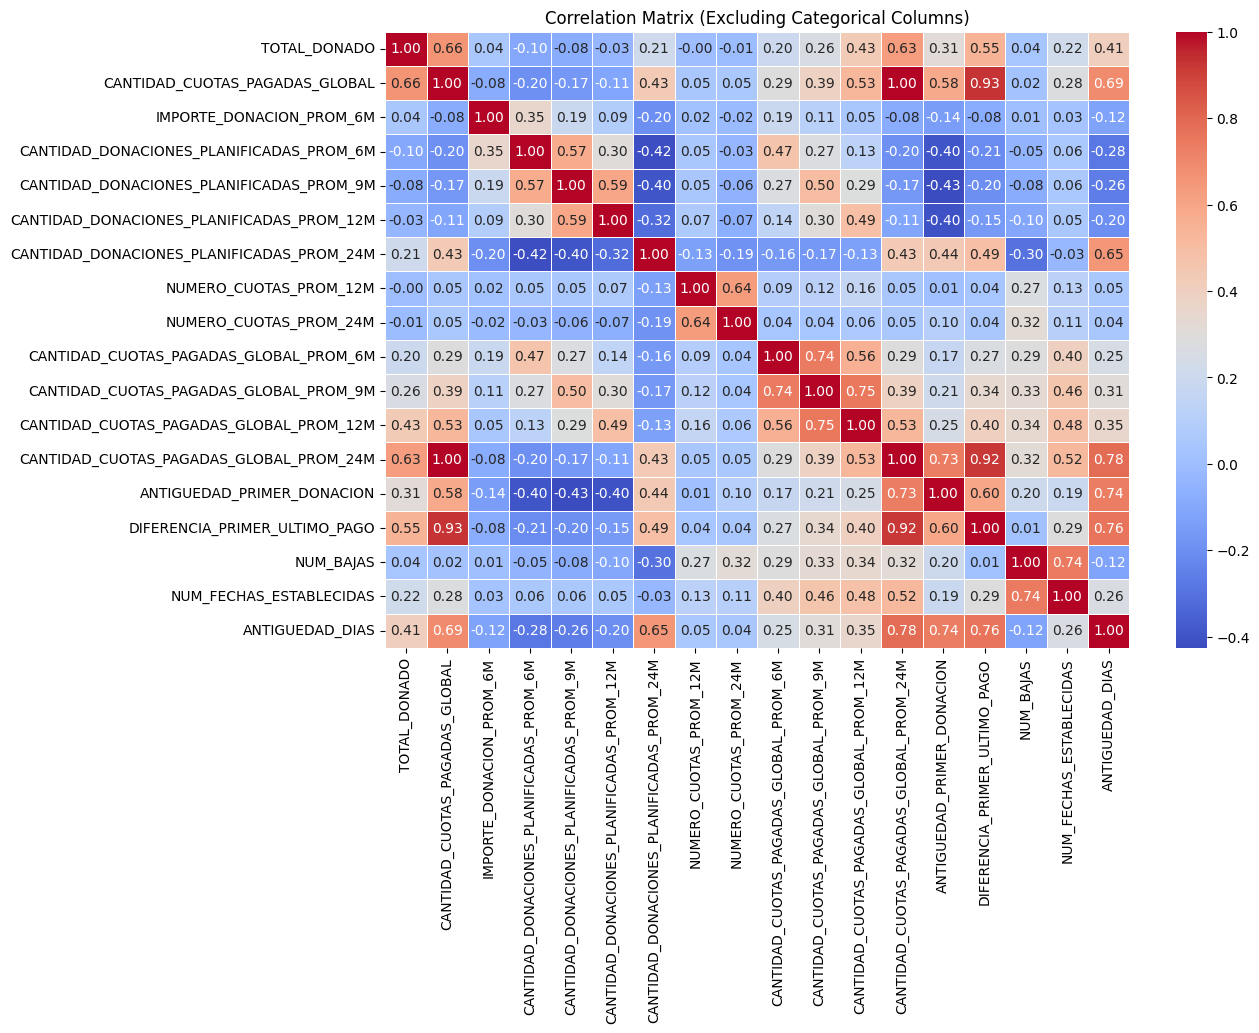

In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns to exclude
cat_cols = [
    "TIPO_COMPROMISO", "TIPO_REGISTRO", "FRECUENCIA", "MEDIO_PAGO",
    "ENTIDAD_COBRADORA", "TIPO_CUENTA", "TIPO_TARJETA", "BANCO_EMISOR",
    "CANAL_CAMPANA", "CODIGO_AUDITORIA", "CAMPANA_ACTIVIDAD",
    "CAMPANA_FIDELIZACION", "CODIGO_UBICACION", "PUNTO_CAPTACION",
    "TIPO_BAJA", "MOTIVO_BAJA"
]

# Exclude categorical columns
numerical_features = X_train.drop(columns=cat_cols, errors="ignore")

# Compute correlation matrix
correlation_matrix = numerical_features.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix (Excluding Categorical Columns)")
plt.show()
